<a href="https://colab.research.google.com/github/deetee67/deetee67/blob/main/Final_version_CDC_DMcKinney_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Python Project2 CDC dataset - DMcKinney**

Researcg Question - What impact does Age have on hospitalization duration, number of medications and procedures. Which age group is impacted more than others?

##**Importing libraries and loading csv dataframe from source**
Importing libraries that will facilitate -  1.data exploration 2.cleaning 3.visualizations 4.setting display format/ alignment 5. others

In [4]:
import pandas as pd
import re
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', -1)

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

# Exploring dataset
Using Pandas to examine the dataset
Looking at its shape, columns/ variables, top/ bottom records/ rows and

Exploring its shape - 
Viewing #of rows X #of columns, shape

 Exploring its Top/ Bottom Rows  - head/ tail

 Exploring random rows
-To identify missing or inacurate values e.g. "**?**" (using df.loc)  and to view/ inspect the data values generally

Explore data types and look for incorrect datatypes

In [6]:
#Showing #of rows X columns in dataset
df.shape

(101766, 50)

In [7]:
#Showing first 2 records/ rows of data - viewing data values and headers/columns
df.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30


In [8]:
#Showing last 2 records/ rows of data - viewing data values and headers/columns and identifying the last row/ index#
df.tail(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [9]:
#Shows list of columns in dataset
df.columns

Index(['encounter_id',
       'patient_nbr',
       'race',
       'gender',
       'age',
       'weight',
       'admission_type_id',
       'discharge_disposition_id',
       'admission_source_id',
       'time_in_hospital',
       'payer_code',
       'medical_specialty',
       'num_lab_procedures',
       'num_procedures',
       'num_medications',
       'number_outpatient',
       'number_emergency',
       'number_inpatient',
       'diag_1',
       'diag_2',
       'diag_3',
       'number_diagnoses',
       'max_glu_serum',
       'A1Cresult',
       'metformin',
       'repaglinide',
       'nateglinide',
       'chlorpropamide',
       'glimepiride',
       'acetohexamide',
       'glipizide',
       'glyburide',
       'tolbutamide',
       'pioglitazone',
       'rosiglitazone',
       'acarbose',
       'miglitol',
       'troglitazone',
       'tolazamide',
       'examide',
       'citoglipton',
       'insulin',
       'glyburide-metformin',
       'glipizide-metform

In [10]:
#Showing details of 50 columns in dataset including number of non-null entries, column names, data types and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [11]:
#Shows that there are only 71,518 unique patient numbers/ id - which means that some patients have multiple encounter_id
#Some patients may have visited the hospital multiple times
df["patient_nbr"].nunique()

71518

In [12]:
#Shows that there are 101,766 unique encounter numbers/ id - which confirms that some patients have multiple encounter_ids in the dataset
#Some patients may have visited the hospital multiple times
df["encounter_id"].nunique()

101766

In [13]:
# setting encounter_id as index column and doing it within the dataframe not creating a new copy - hence dataframe is adjusted
df.set_index('encounter_id', inplace=True)

In [14]:
#Dataframe now shows Encounter_Id as the index
df.head(2)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30


# **Data Cleaning**
Replacing string "?" with text "missing value"

Dropping unwanted contiguous and non-contibuous columns

Transforming Age column from object/ category to integer 

Renaming variables/ columns

Subsetting dataset 

In [15]:
# Remove some contigous columns
df.drop(df.iloc[:, 14:46], inplace = True, axis = 1)

In [16]:
df.head(2)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,Ch,Yes,>30


In [17]:
# Remove other 4 other non-contiguous columns 
df.drop(df.columns[[1, 4, 9,10]], axis = 1, inplace = True)

In [18]:
#Shows new shape of dataframe with 37 unwanted columns removed/ dropped
df.shape

(101766, 13)

In [19]:
df.head(2)

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,
2278392,8222157,Female,[0-10),6,25,1,1,41,0,1,No,No,NO
149190,55629189,Female,[10-20),1,1,7,3,59,0,18,Ch,Yes,>30


In [20]:
#More cleaning - Replacing all occurrences of the string "?" with the string "missing value" in the dataset
df.replace (["?"],"missing value", inplace=True)

In [21]:
#Shows change of column names, AGE, NUM_PROCEDURES, DIABETS_MED, 
#Transforming column age values from object to an ID (integer) 1,2,3,4 etc.
df['age'].replace(["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"], [1,2,3,4,5,6,7,8,9,10], inplace = True)
df.rename(columns = {"age":"age_code", "num_procedures":"other_procedures","diabetesMed":"diab_Med_Presc"}, inplace = True)

## **Transformation of age to age_code column**

**age_code**  1, 2, 3, 4, 5, 6, 7, 8, 9, 10

**Age_Category** [0-10], [10-20], [20-30], [30-40], [40-50], [50-60], [60-70], [70-80], [80-90], [90-100]


In [22]:
#Shows column with new names and age_Id column showing integers to represent age categories
df.head(2)

,patient_nbr,gender,age_code,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,other_procedures,num_medications,change,diab_Med_Presc,readmitted
encounter_id,,,,,,,,,,,,,
2278392,8222157,Female,1,6,25,1,1,41,0,1,No,No,NO
149190,55629189,Female,2,1,1,7,3,59,0,18,Ch,Yes,>30


In [23]:
#Showing discharge disposition data - #1 is patients discharged to their homes, 2 - 6 patients discharged to ther facilities
df[["discharge_disposition_id"]].value_counts(ascending=False)

discharge_disposition_id
1                           60234
3                           13954
6                           12902
18                           3691
2                            2128
22                           1993
11                           1642
5                            1184
25                            989
4                             815
7                             623
23                            412
13                            399
14                            372
28                            139
8                             108
15                             63
24                             48
9                              21
17                             14
16                             11
19                              8
10                              6
27                              5
12                              3
20                              2
dtype: int64

In [24]:
#Subsetting the dataset to show some columns age impact on procedures, ti,e in hospital
df_age=df[['gender','age_code','discharge_disposition_id','time_in_hospital','num_lab_procedures', 'other_procedures','num_medications']]
#Only selecting rows that containt discharge dispositions 2 to 6. This is where patients are discharged to another facility
df_dsch_facility=df_age.loc[df_age['discharge_disposition_id'].isin([2,3,4,5,6])]

# **Descriptive Statistics**

In [25]:
#Showing some the mean, max, min of data subset
df_dsch_facility.describe()

,age_code,discharge_disposition_id,time_in_hospital,num_lab_procedures,other_procedures,num_medications
count,30983.000000,30983.000000,30983.000000,30983.000000,30983.000000,30983.000000
mean,7.767389,4.283317,5.492335,44.750186,1.235678,17.987090
std,1.349138,1.532585,3.140040,20.119184,1.555891,8.372441
min,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
25%,7.000000,3.000000,3.000000,32.000000,0.000000,12.000000
50%,8.000000,3.000000,5.000000,46.000000,1.000000,17.000000
75%,9.000000,6.000000,7.000000,59.000000,2.000000,22.000000
max,10.000000,6.000000,14.000000,129.000000,6.000000,79.000000


In [26]:
#df_dsch_facility.groupby(['gender','age_code']).count()
Final_df=df_dsch_facility[['age_code','gender','time_in_hospital','num_lab_procedures', 'other_procedures','num_medications']]
Final_df.describe()

,age_code,time_in_hospital,num_lab_procedures,other_procedures,num_medications
count,30983.000000,30983.000000,30983.000000,30983.000000,30983.000000
mean,7.767389,5.492335,44.750186,1.235678,17.987090
std,1.349138,3.140040,20.119184,1.555891,8.372441
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,7.000000,3.000000,32.000000,0.000000,12.000000
50%,8.000000,5.000000,46.000000,1.000000,17.000000
75%,9.000000,7.000000,59.000000,2.000000,22.000000
max,10.000000,14.000000,129.000000,6.000000,79.000000


In [27]:
Final_df.groupby(['gender', 'age_code']).median()

time_in_hospital  \
gender age_code                     
Female 1                      1.5   
       2                      4.0   
       3                      4.0   
       4                      4.5   
       5                      5.0   
       6                      5.0   
       7                      5.0   
       8                      5.0   
       9                      5.0   
       10                     4.0   
Male   1                      2.0   
       2                      3.0   
       3                      4.0   
       4                      5.0   
       5                      5.0   
       6                      5.0   
       7                      5.0   
       8                      5.0   
       9                      5.0   
       10                     5.0   

                 num_lab_procedures  \
gender age_code                       
Female 1                       16.0   
       2                       44.0   
       3                       50.0   
       4                       46.5   
       5                       45.0   
       6                       45.0   
       7                       45.0   
       8                       46.0   
       9                       47.0   
       10                      47.0   
Male   1                       44.0   
       2                       43.0   
       3                       46.0   
       4                       46.0   
       5                       45.0   
       6                       45.0   
       7                       46.0   
       8                       46.0   
       9                       47.0   
       10                      47.0   

                 other_procedures  \
gender age_code                     
Female 1                      0.5   
       2                      1.0   
       3                      1.0   
       4                      1.0   
       5                      1.0   
       6                      1.0   
       7                      1.0   
       8                      1.0   
       9                      0.0   
       10                     0.0   
Male   1                      0.5   
       2                      0.0   
       3                      0.0   
       4                      1.0   
       5                      1.0   
       6                      1.0   
       7                      1.0   
       8                      1.0   
       9                      0.0   
       10                     0.0   

                 num_medications  
gender age_code                   
Female 1                     3.0  
       2                     8.0  
       3                    14.0  
       4                    18.0  
       5                    19.0  
       6                    19.0  
       7                    19.0  
       8                    17.0  
       9                    15.0  
       10                   14.0  
Male   1                     5.5  
       2                     8.0  
       3                    13.0  
       4                    15.0  
       5                    17.0  
       6                    18.0  
       7                    18.0  
       8                    16.0  
       9                    15.0  
       10                   13.0

In [28]:
Final_df.groupby(['gender', 'age_code']).mean()

time_in_hospital  \
gender age_code                     
Female 1                 1.500000   
       2                 5.181818   
       3                 5.139241   
       4                 5.397059   
       5                 5.683544   
       6                 5.459875   
       7                 5.546785   
       8                 5.529282   
       9                 5.443778   
       10                5.108678   
Male   1                 2.000000   
       2                 4.000000   
       3                 5.511628   
       4                 5.507317   
       5                 5.461078   
       6                 5.514575   
       7                 5.579926   
       8                 5.556904   
       9                 5.497192   
       10                5.171492   

                 num_lab_procedures  \
gender age_code                       
Female 1                  16.000000   
       2                  47.000000   
       3                  46.848101   
       4                  44.946078   
       5                  45.104079   
       6                  43.952760   
       7                  43.778167   
       8                  44.641638   
       9                  45.180759   
       10                 44.960260   
Male   1                  44.000000   
       2                  44.769231   
       3                  46.325581   
       4                  47.575610   
       5                  45.651198   
       6                  44.254610   
       7                  45.147212   
       8                  44.531108   
       9                  44.956392   
       10                 46.271715   

                 other_procedures  \
gender age_code                     
Female 1                 0.500000   
       2                 0.636364   
       3                 1.202532   
       4                 1.593137   
       5                 1.452883   
       6                 1.462721   
       7                 1.381604   
       8                 1.233156   
       9                 0.924978   
       10                0.673966   
Male   1                 0.500000   
       2                 1.307692   
       3                 0.790698   
       4                 1.400000   
       5                 1.525449   
       6                 1.742415   
       7                 1.597398   
       8                 1.313101   
       9                 1.018500   
       10                0.592428   

                 num_medications  
gender age_code                   
Female 1                3.000000  
       2               11.090909  
       3               15.886076  
       4               19.171569  
       5               20.022504  
       6               20.127490  
       7               19.871738  
       8               18.285845  
       9               16.411827  
       10              14.682076  
Male   1                5.500000  
       2               12.615385  
       3               13.883721  
       4               17.102439  
       5               18.318862  
       6               19.732302  
       7               19.539777  
       8               18.081184  
       9               16.260984  
       10              14.080178

In [29]:
Final_df.groupby(['age_code']).max()

,gender,time_in_hospital,num_lab_procedures,other_procedures,num_medications
age_code,,,,,
1,Male,3,44,1,8
2,Male,13,103,6,27
3,Male,14,92,6,44
4,Male,14,103,6,55
5,Male,14,120,6,68
6,Male,14,105,6,79
7,Male,14,121,6,72
8,Male,14,109,6,72
9,Male,14,129,6,65


# **Data Visualizations**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f625deb5ed0>,
      dtype=object)

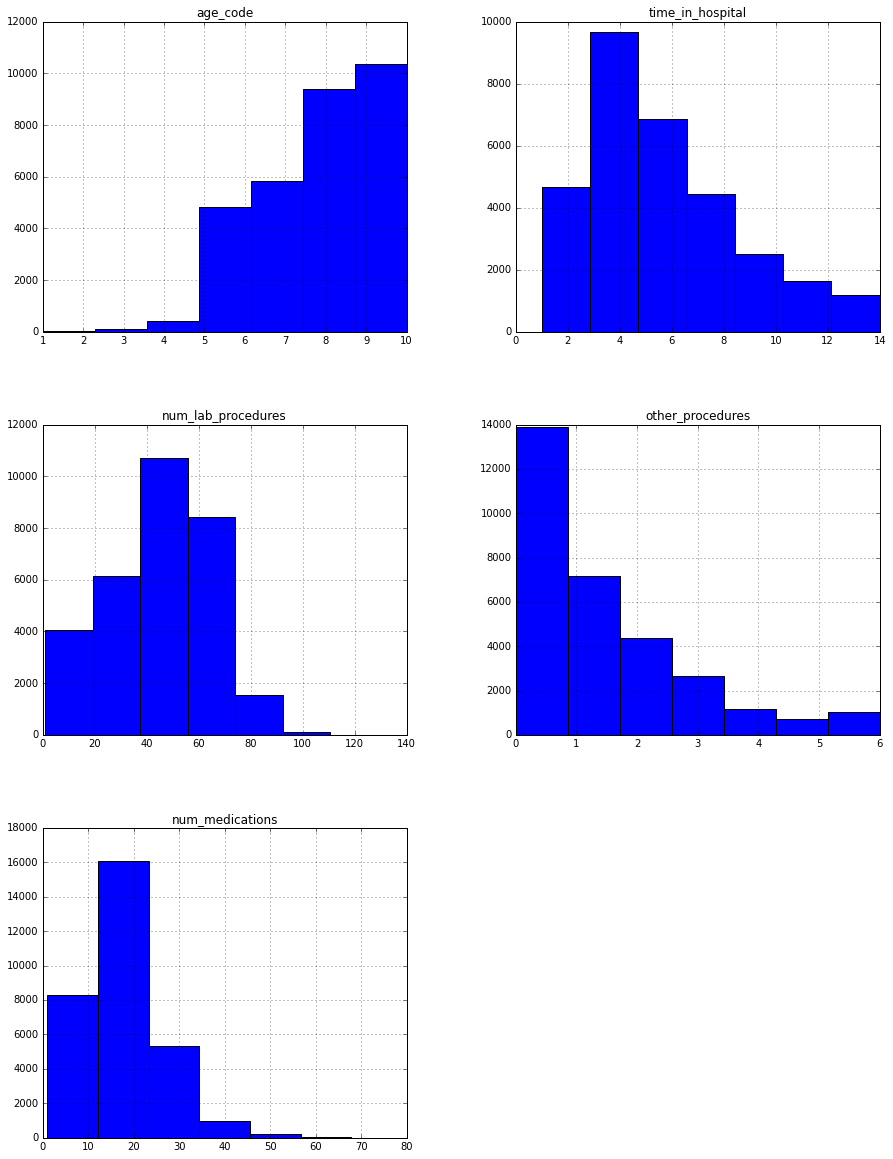

In [31]:
Final_df.hist(bins=7,figsize=[15,20])

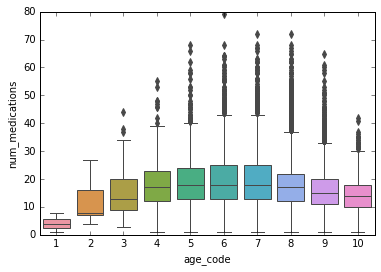

In [32]:
#sns.displot(Final_df['time_in_hospital'], bins=7)
sns.boxplot(x='age_code', y='num_medications', data=Final_df)


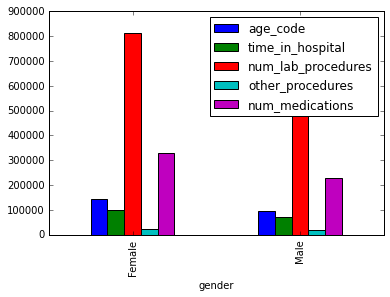

In [33]:
Final_df.groupby('gender').sum().plot(kind='bar')


Text(0, 0.5, 'Frequency')

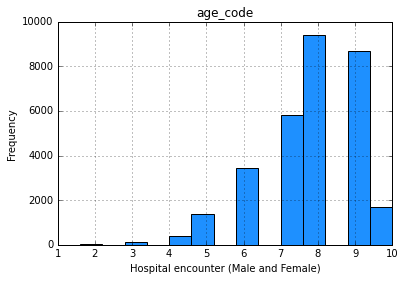

In [41]:
#HISTOGRAM - showing Male and Female encounters 
Final_df.hist(column='age_code', bins=15, color='#1e90ff')
plt.xlabel('Hospital encounter (Male and Female)')
plt.ylabel('Frequency')


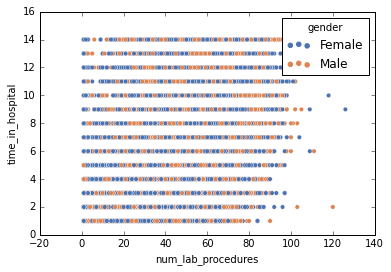

In [40]:
sns.scatterplot(data=Final_df, x="num_lab_procedures", y="time_in_hospital", hue="gender", palette="deep")